### Multiple Linear Regression

## multiple inputs single output

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Desktop/scorecard2019.csv")

In [3]:
%matplotlib inline

In [4]:
data.head()

,Batsmen,Runs,Balls,Fours,sixes
0,DA Warner,692,481,688,51
1,Q de Kock †,529,398,625,41
2,S Dhawan,521,384,598,61
3,AD Russell,510,249,369,33
4,RR Pant †,488,300,523,37


In [5]:
data.shape

(156, 5)

In [6]:
data.columns

Index(['Batsmen', 'Runs', 'Balls', 'Fours', 'sixes'], dtype='object')

In [7]:
data.corr()

,Runs,Balls,Fours,sixes
Runs,1.000000,0.984314,0.976423,0.961670
Balls,0.984314,1.000000,0.990124,0.952654
Fours,0.976423,0.990124,1.000000,0.946460
sixes,0.961670,0.952654,0.946460,1.000000


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
import seaborn as sns

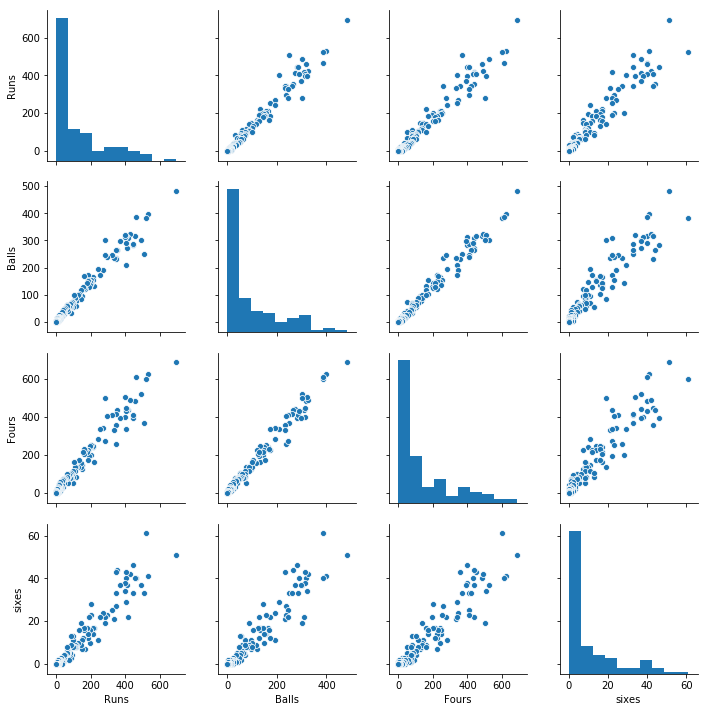

In [10]:
sns.pairplot(data.iloc[:,:])

In [11]:
import statsmodels.formula.api as smf

In [12]:
s1= smf.ols("Balls ~ Fours+ sixes+ Runs", data=data).fit()

In [13]:
s1.params

Intercept    0.971354
Fours        0.410402
sixes        0.153291
Runs         0.258109
dtype: float64

In [14]:
s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Balls   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3838.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          5.32e-143
Time:                        20:41:33   Log-Likelihood:                -614.93
No. Observations:                 156   AIC:                             1238.
Df Residuals:                     152   BIC:                             1250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9714      1.315      0.739      0.461      -1.627       3.570
Fours          0.4104      0.029     14.332      0.000       0.354       0.467
sixes          0.1533      0.272      0.564      0.573      -0.383       0.690
Runs           0.2581      0.036      7.089      0.000       0.186       0.330
==============================================================================
Omnibus:                       28.942   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.549
Skew:                           0.360   Prob(JB):                     1.25e-38
Kurtosis:                       8.132   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
s1_v= smf.ols("Balls ~ sixes", data = data).fit()

In [16]:
s2_w=smf.ols("Balls~Runs+Fours",data=data).fit()

In [17]:
s2_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Balls   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     5783.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          7.26e-145
Time:                        20:41:34   Log-Likelihood:                -615.09
No. Observations:                 156   AIC:                             1236.
Df Residuals:                     153   BIC:                             1245.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9210      1.309      0.704      0.483      -1.665       3.507
Runs           0.2692      0.031      8.793      0.000       0.209       0.330
Fours          0.4124      0.028     14.551      0.000       0.356       0.468
==============================================================================
Omnibus:                       28.792   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.709
Skew:                           0.310   Prob(JB):                     2.86e-41
Kurtosis:                       8.324   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

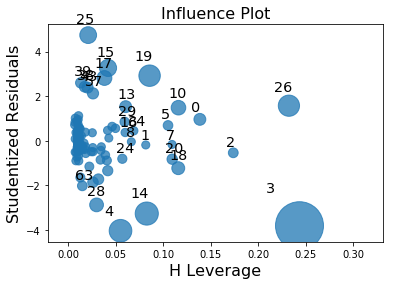

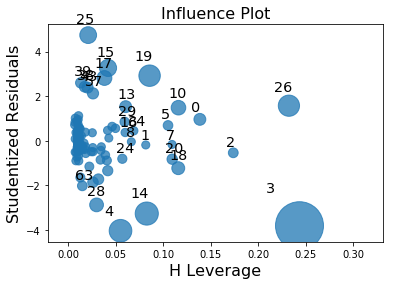

In [18]:
import statsmodels.api as sm
sm.graphics.influence_plot(s1)

In [19]:
data_new=data.drop(data.index[[3,4,14]],axis = 0,inplace = False)

In [20]:
data_new.tail(20)

,Batsmen,Runs,Balls,Fours,sixes
136,Washington Sundar,1,3,9,0
137,Mohammed Shami,1,2,4,0
138,JD Unadkat,1,3,9,0
139,Basil Thampi,1,1,1,0
140,HF Gurney,1,5,22,0
141,MM Sharma,0,2,3,0
142,Mujeeb Ur Rahman,0,4,8,0
143,AJ Tye,0,2,10,0
144,SW Billings †,0,4,7,0
145,HV Patel,0,2,3,0


In [21]:
s1_new= smf.ols("Balls ~ Runs+Fours+sixes", data = data_new).fit()

In [22]:
s1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Balls   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5230.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          1.03e-150
Time:                        20:41:39   Log-Likelihood:                -576.01
No. Observations:                 153   AIC:                             1160.
Df Residuals:                     149   BIC:                             1172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8097      1.104      0.733      0.465      -1.372       2.992
Runs           0.4054      0.037     11.067      0.000       0.333       0.478
Fours          0.3282      0.027     12.128      0.000       0.275       0.382
sixes         -0.3467      0.236     -1.467      0.144      -0.814       0.120
==============================================================================
Omnibus:                       40.447   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.299
Skew:                           0.917   Prob(JB):                     2.31e-33
Kurtosis:                       7.496   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print(s1_new.conf_int(0.05))

                  0         1
Intercept -1.372335  2.991813
Runs       0.333012  0.477780
Fours      0.274705  0.381647
sixes     -0.813662  0.120231


In [24]:
mpg_pred = s1_new.predict(data_new)


In [25]:
data_new['pv'] = data_new['pv'] =mpg_pred

In [26]:
data_new['pv']

0      489.446454
1      406.158955
2      387.120717
5      375.483239
6      331.449727
7      294.891616
8      302.449022
9      318.285531
10     305.567877
11     298.996511
12     292.570403
13     297.437424
15     279.596253
16     315.943511
17     266.140205
18     272.400174
19     216.230445
20     242.516066
21     266.001962
22     237.074660
23     258.447754
24     246.400170
25     197.423929
26     273.288210
27     214.027273
28     206.342531
29     189.442686
30     137.595409
31     160.683542
32     162.881954
          ...    
126      8.338492
127      4.053664
128      5.635864
129      9.245800
130      7.933096
131      6.292216
132      4.651336
133      4.245940
134      1.948707
135      2.856015
136      4.168719
137      2.527839
138      4.168719
139      1.543311
140      8.435008
141      1.794267
142      3.435147
143      4.091499
144      3.106971
145      1.794267
146      3.106971
147      4.091499
148      1.794267
149      1.137915
150      1

In [27]:
data_new.head()

,Batsmen,Runs,Balls,Fours,sixes,pv
0,DA Warner,692,481,688,51,489.446454
1,Q de Kock †,529,398,625,41,406.158955
2,S Dhawan,521,384,598,61,387.120717
5,SS Iyer (c),463,386,612,40,375.483239
6,V Kohli (c),458,316,484,40,331.449727


In [28]:
data['P'] = data['p'] = mpg_pred

In [29]:
data.head()

,Batsmen,Runs,Balls,Fours,sixes,P,p
0,DA Warner,692,481,688,51,489.446454,489.446454
1,Q de Kock †,529,398,625,41,406.158955,406.158955
2,S Dhawan,521,384,598,61,387.120717,387.120717
3,AD Russell,510,249,369,33,NaN,NaN
4,RR Pant †,488,300,523,37,NaN,NaN


In [30]:
rsq_hp = smf.ols("Balls ~ Runs+Fours+sixes", data = data).fit()
rsq_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Balls   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3838.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          5.32e-143
Time:                        20:41:40   Log-Likelihood:                -614.93
No. Observations:                 156   AIC:                             1238.
Df Residuals:                     152   BIC:                             1250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9714      1.315      0.739      0.461      -1.627       3.570
Runs           0.2581      0.036      7.089      0.000       0.186       0.330
Fours          0.4104      0.029     14.332      0.000       0.354       0.467
sixes          0.1533      0.272      0.564      0.573      -0.383       0.690
==============================================================================
Omnibus:                       28.942   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.549
Skew:                           0.360   Prob(JB):                     1.25e-38
Kurtosis:                       8.132   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
rsq_hp = smf.ols("Balls ~ Runs+Fours+sixes", data = data).fit().rsquared

In [32]:
vif_hp = 1/(1-rsq_hp)

In [33]:
vif_hp

76.7499915887142

In [34]:
rsq_sp = smf.ols("sixes ~ Balls+Fours+Runs", data = data).fit().rsquared

In [35]:
vif_sp = 1/(1-rsq_sp)
vif_sp

13.542643284120526

In [36]:
rsq_vol = smf.ols("Runs ~ Balls+Fours+sixes", data = data).fit().rsquared

In [37]:
vif_vol = 1/(1-rsq_vol)

In [38]:
vif_vol

40.21548452762829

In [39]:
rsq_wt = smf.ols("Fours~ Balls+sixes+Runs", data = data).fit().rsquared

In [40]:
vif_wt = 1/(1-rsq_wt)
vif_wt

51.27416365105212

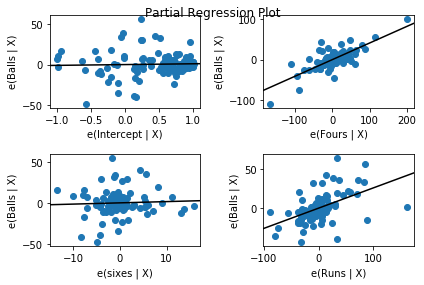

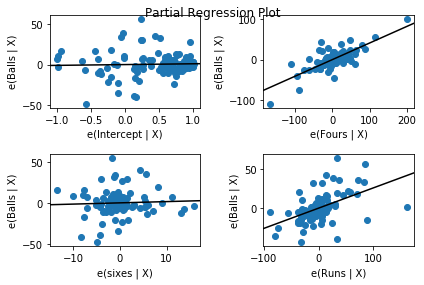

In [41]:
sm.graphics.plot_partregress_grid(s1)